<a href="https://colab.research.google.com/github/xFlodz/neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%962%20%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%B8%D1%85%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85%20%D1%81%D0%B5%D1%82%D0%B5%D0%B9%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8%20%D0%B8%20%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#### 1.2. Проектируем архитектуру для этой задачи

In [2]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential


model = Sequential([
    Dense(16, input_shape=(13,), activation="relu"),
    Dropout(0.3),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [3]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#### 1.4. Обучаем модель ИНС

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
result = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 360.7467 - mae: 16.4473 - val_loss: 43.9853 - val_mae: 4.3016
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 78.8349 - mae: 6.5863 - val_loss: 38.6252 - val_mae: 4.0339
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 39.5894 - mae: 4.8299 - val_loss: 35.8066 - val_mae: 3.9234
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 44.0925 - mae: 5.0289 - val_loss: 34.2335 - val_mae: 4.0373
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 43.3151 - mae: 4.7443 - val_loss: 52.7901 - val_mae: 5.6417
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 44.3672 - mae: 4.8125 - val_loss: 26.8705 - val_mae: 3.4193
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 35.1078 - mae: 4.3283 - val_loss: 25.6757 - val_mae: 3.2950
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 37.0025 - mae: 4.4635 - val_loss: 28.4739 - val_mae: 3.3361
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━

#### 1.6. Делаем предсказания на тестовых данных

In [6]:
predicts = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [7]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predicts, y_test)

2.790525530833824

In [8]:
print(result.history['loss'])

[232.08197021484375, 66.42765045166016, 41.291587829589844, 38.8237419128418, 48.93613052368164, 43.70198059082031, 38.109336853027344, 35.88123321533203, 31.34264373779297, 36.198219299316406, 31.75385284423828, 30.66189956665039, 26.575044631958008, 29.96316146850586, 32.96366882324219, 30.59812355041504, 30.830324172973633, 26.43492889404297, 21.943838119506836, 28.334362030029297, 25.189062118530273, 23.211605072021484, 19.05939292907715, 21.691028594970703, 28.66595458984375, 23.85064125061035, 25.9360294342041, 23.05145263671875, 20.96715545654297, 22.876192092895508, 19.661224365234375, 21.03697967529297, 20.887462615966797, 20.15394401550293, 21.49635887145996, 19.678783416748047, 22.702194213867188, 17.550365447998047, 22.8210506439209, 18.69986915588379, 19.057809829711914, 19.462430953979492, 19.783910751342773, 17.277124404907227, 17.564525604248047, 19.376758575439453, 22.178638458251953, 16.782466888427734, 19.76641273498535, 21.30276107788086, 19.889171600341797, 17.6444

#### 1.8. Строим график обучения

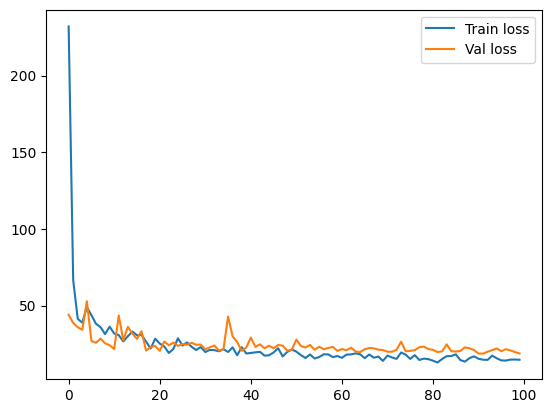

In [9]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'], label='Train loss')
plt.plot(result.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [10]:
def predicts(crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat):

    input_data = np.array([[crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat]])
    input_data_scaled = scaler.transform(input_data)

    prediction = model.predict(input_data_scaled)

    return f"${prediction[0,0]:,.2f}"

In [11]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
to

In [12]:
import gradio as gr

interface = gr.Interface(
    fn=predicts,
    inputs=[
        gr.Slider(label="CRIM", minimum=0.006, maximum=89.000, step=0.1, value=0.02985),
        gr.Slider(label="ZN", minimum=0.0, maximum=100.0, step=1, value=0.0),
        gr.Slider(label="INDUS", minimum=0.4, maximum=28.0, step=0.1, value=2.180),
        gr.Slider(label="CHAS", minimum=0.0, maximum=1.0, step=0.1, value=0),
        gr.Slider(label="NOX", minimum=0.3, maximum=0.9, step=0.01, value=0.4580),
        gr.Slider(label="RM", minimum=3.6, maximum=8.8, step=0.1, value=6.4300),
        gr.Slider(label="AGE", minimum=2.9, maximum=100.0, step=0.1, value=58.70),
        gr.Slider(label="DIS", minimum=1.0, maximum=12.2, step=0.1, value=6.062),
        gr.Slider(label="RAD", minimum=1, maximum=24, step=1, value=3),
        gr.Slider(label="TAX", minimum=180, maximum=720, step=1, value=222.0),
        gr.Slider(label="PTRATIO", minimum=2, maximum=22, step=0.1, value=18.70),
        gr.Slider(label="B", minimum=0.3, maximum=397.0, step=0.1, value=394.12),
        gr.Slider(label="LSTAT", minimum=1.7, maximum=38.0, step=0.1, value=5.21),
    ],

    live=True,
    outputs=gr.Text(label="Результат модели"),
)

interface.launch(debug=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ae5ceb826b8898c42b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [13]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 3. Указываем путь к набору данных:

In [15]:
%%capture
!unzip /content/drive/MyDrive/animals_new.zip -d animals_new

In [16]:
imagesPath = sorted(list(paths.list_images('/content/animals_new/raw-img')))
print(imagesPath)
random.shuffle(imagesPath)
print(imagesPath)

['/content/animals_new/raw-img/chicken/10.jpeg', '/content/animals_new/raw-img/chicken/100.jpeg', '/content/animals_new/raw-img/chicken/1000.jpeg', '/content/animals_new/raw-img/chicken/1001.jpeg', '/content/animals_new/raw-img/chicken/1010.jpeg', '/content/animals_new/raw-img/chicken/1013.jpeg', '/content/animals_new/raw-img/chicken/1016.jpeg', '/content/animals_new/raw-img/chicken/1017.jpeg', '/content/animals_new/raw-img/chicken/1018.jpeg', '/content/animals_new/raw-img/chicken/102.jpeg', '/content/animals_new/raw-img/chicken/1020.jpeg', '/content/animals_new/raw-img/chicken/1021.jpeg', '/content/animals_new/raw-img/chicken/1023.jpeg', '/content/animals_new/raw-img/chicken/1024.jpeg', '/content/animals_new/raw-img/chicken/1026.jpeg', '/content/animals_new/raw-img/chicken/1028.jpeg', '/content/animals_new/raw-img/chicken/103.jpeg', '/content/animals_new/raw-img/chicken/1030.jpeg', '/content/animals_new/raw-img/chicken/1031.jpeg', '/content/animals_new/raw-img/chicken/1032.jpeg', '/co

### 4. Загружаем набор данных и формируем общую выборку:

In [17]:
class_dict = {}

for imagePath in imagesPath:
    label = imagePath.split(os.path.sep)[-2]
    if label not in class_dict:
        class_dict[label] = []
    class_dict[label].append(imagePath)

balanced_images = []
for label, images in class_dict.items():
    balanced_images.extend(images[:1000])

data, labels_str = [], []

for imagePath in balanced_images:
    try:
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (64, 64)).flatten()
        data.append(image)
        label = imagePath.split(os.path.sep)[-2]
        labels_str.append(label)
    except:
        continue

In [18]:
unique_labels = np.unique(labels_str)                  # Список уникальных строк
label_map = {lbl: idx for idx, lbl in enumerate(unique_labels)}
labels_int = np.array([label_map[lbl] for lbl in labels_str], dtype="int")

unique_labels, label_map, labels_int

(array(['chicken', 'cow', 'dog', 'elephant'], dtype='<U8'),
 {'chicken': 0, 'cow': 1, 'dog': 2, 'elephant': 3},
 array([2, 2, 2, ..., 3, 3, 3]))

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [19]:
data = np.array(data, dtype="float") / 255.0

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [20]:
from tensorflow.keras.utils import to_categorical

(X_train, X_test, trainY_int, testY_int) = train_test_split(data, labels_int, test_size=0.25, random_state=52)

trainY = to_categorical(trainY_int, num_classes=len(unique_labels))
testY = to_categorical(testY_int, num_classes=len(unique_labels))

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [21]:
model = Sequential()
model.add(Dense(2048, input_shape=(12288,), activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(len(unique_labels), activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [22]:
INIT_LR = 0.001
EPOCHS = 80

#### 5.3. Компилируем модель:

In [23]:
opt = SGD(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [24]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=7)

checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/models_data.h5", monitor="val_accuracy", save_best_only=True, verbose=0)

#### 6.2. Запустим процесс обучения модели:

In [25]:
result = model.fit(X_train, trainY, validation_data=(X_test, testY), epochs=EPOCHS, batch_size=100, callbacks=[early_stopping, checkpoint])

Epoch 1/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.2559 - loss: 1.3996

30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 585ms/step - accuracy: 0.2563 - loss: 1.3992 - val_accuracy: 0.2860 - val_loss: 1.3779
Epoch 2/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.3267 - loss: 1.3704

30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 493ms/step - accuracy: 0.3267 - loss: 1.3704 - val_accuracy: 0.3240 - val_loss: 1.3688
Epoch 3/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.3444 - loss: 1.3623

30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 501ms/step - accuracy: 0.3444 - loss: 1.3623 - val_accuracy: 0.3430 - val_loss: 1.3597
Epoch 4/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.3497 - loss: 1.3543

30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 506ms/step - accuracy: 0.3498 - loss: 1.3543 - val_accuracy: 0.3760 - val_loss: 1.3521
Epoch 5/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 411ms/step - accuracy: 0.3679 - loss: 1.3470 - val_accuracy: 0.3490 - val_loss: 1.3466
Epoch 6/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 491ms/step - accuracy: 0.4032 - loss: 1.3347 - val_accuracy: 0.3710 - val_loss: 1.3410
Epoch 7/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.3894 - loss: 1.3315

30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 474ms/step - accuracy: 0.3894 - loss: 1.3315 - val_accuracy: 0.3880 - val_loss: 1.3351
Epoch 8/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 407ms/step - accuracy: 0.3975 - loss: 1.3265 - val_accuracy: 0.3800 - val_loss: 1.3311
Epoch 9/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.3906 - loss: 1.3213

30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 476ms/step - accuracy: 0.3909 - loss: 1.3212 - val_accuracy: 0.4010 - val_loss: 1.3250
Epoch 10/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 413ms/step - accuracy: 0.4050 - loss: 1.3117 - val_accuracy: 0.3980 - val_loss: 1.3215
Epoch 11/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 431ms/step - accuracy: 0.4198 - loss: 1.3070 - val_accuracy: 0.3990 - val_loss: 1.3164
Epoch 12/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 399ms/step - accuracy: 0.4026 - loss: 1.3062 - val_accuracy: 0.3910 - val_loss: 1.3133
Epoch 13/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 433ms/step - accuracy: 0.4218 - loss: 1.2959 - val_accuracy: 0.3740 - val_loss: 1.3107
Epoch 14/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 472ms/step - accuracy: 0.4141 - loss: 1.2933 - val_accuracy: 0.4000 - val_loss: 1.3048
Epoch 15/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 432ms/step - accuracy: 0.4285 - loss: 1.2901 - val_accuracy: 0.4010 - val_loss: 1.2999
Epoch 16/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.4318 - loss: 1.2809

30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 465ms/step - accuracy: 0.4319 - loss: 1.2808 - val_accuracy: 0.4050 - val_loss: 1.2967
Epoch 17/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 514ms/step - accuracy: 0.4390 - loss: 1.2765 - val_accuracy: 0.3990 - val_loss: 1.2923
Epoch 18/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.4404 - loss: 1.2667

30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 477ms/step - accuracy: 0.4405 - loss: 1.2668 - val_accuracy: 0.4080 - val_loss: 1.2896
Epoch 19/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 418ms/step - accuracy: 0.4339 - loss: 1.2639 - val_accuracy: 0.4040 - val_loss: 1.2874
Epoch 20/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 431ms/step - accuracy: 0.4511 - loss: 1.2657 - val_accuracy: 0.4050 - val_loss: 1.2840
Epoch 21/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 380ms/step - accuracy: 0.4662 - loss: 1.2533 - val_accuracy: 0.4080 - val_loss: 1.2807
Epoch 22/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.4540 - loss: 1.2486

30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 507ms/step - accuracy: 0.4541 - loss: 1.2486 - val_accuracy: 0.4090 - val_loss: 1.2772
Epoch 23/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 456ms/step - accuracy: 0.4714 - loss: 1.2391 - val_accuracy: 0.4080 - val_loss: 1.2764
Epoch 24/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.4595 - loss: 1.2463

30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 479ms/step - accuracy: 0.4599 - loss: 1.2461 - val_accuracy: 0.4100 - val_loss: 1.2708
Epoch 25/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.4649 - loss: 1.2367

30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 500ms/step - accuracy: 0.4652 - loss: 1.2366 - val_accuracy: 0.4110 - val_loss: 1.2710
Epoch 26/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 454ms/step - accuracy: 0.4742 - loss: 1.2286 - val_accuracy: 0.4110 - val_loss: 1.2656
Epoch 27/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.4941 - loss: 1.2184

30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 479ms/step - accuracy: 0.4938 - loss: 1.2186 - val_accuracy: 0.4140 - val_loss: 1.2626
Epoch 28/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.4719 - loss: 1.2255

30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 488ms/step - accuracy: 0.4721 - loss: 1.2253 - val_accuracy: 0.4200 - val_loss: 1.2580
Epoch 29/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 454ms/step - accuracy: 0.4874 - loss: 1.2177 - val_accuracy: 0.4070 - val_loss: 1.2614
Epoch 30/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.4771 - loss: 1.2104

30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 447ms/step - accuracy: 0.4776 - loss: 1.2105 - val_accuracy: 0.4210 - val_loss: 1.2531
Epoch 31/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.4964 - loss: 1.2059

30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 503ms/step - accuracy: 0.4963 - loss: 1.2059 - val_accuracy: 0.4230 - val_loss: 1.2506
Epoch 32/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.4961 - loss: 1.1996

30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 493ms/step - accuracy: 0.4961 - loss: 1.1997 - val_accuracy: 0.4370 - val_loss: 1.2514
Epoch 33/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 412ms/step - accuracy: 0.5152 - loss: 1.1918 - val_accuracy: 0.4350 - val_loss: 1.2458
Epoch 34/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 435ms/step - accuracy: 0.5151 - loss: 1.1908 - val_accuracy: 0.4280 - val_loss: 1.2439
Epoch 35/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.4875 - loss: 1.2032

30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 451ms/step - accuracy: 0.4880 - loss: 1.2027 - val_accuracy: 0.4440 - val_loss: 1.2417
Epoch 36/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.5100 - loss: 1.1831

30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 507ms/step - accuracy: 0.5101 - loss: 1.1831 - val_accuracy: 0.4450 - val_loss: 1.2404
Epoch 37/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 434ms/step - accuracy: 0.5057 - loss: 1.1821 - val_accuracy: 0.4420 - val_loss: 1.2349
Epoch 38/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 438ms/step - accuracy: 0.5238 - loss: 1.1700 - val_accuracy: 0.4420 - val_loss: 1.2353
Epoch 39/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 440ms/step - accuracy: 0.5338 - loss: 1.1634 - val_accuracy: 0.4420 - val_loss: 1.2296
Epoch 40/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 495ms/step - accuracy: 0.5231 - loss: 1.1618 - val_accuracy: 0.4430 - val_loss: 1.2276
Epoch 41/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.5273 - loss: 1.1551

30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 480ms/step - accuracy: 0.5271 - loss: 1.1553 - val_accuracy: 0.4480 - val_loss: 1.2253
Epoch 42/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.5302 - loss: 1.1625

30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 498ms/step - accuracy: 0.5301 - loss: 1.1623 - val_accuracy: 0.4500 - val_loss: 1.2239
Epoch 43/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 452ms/step - accuracy: 0.5342 - loss: 1.1478 - val_accuracy: 0.4450 - val_loss: 1.2263
Epoch 44/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 436ms/step - accuracy: 0.5379 - loss: 1.1362 - val_accuracy: 0.4480 - val_loss: 1.2226
Epoch 45/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.5431 - loss: 1.1495

30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 443ms/step - accuracy: 0.5429 - loss: 1.1493 - val_accuracy: 0.4660 - val_loss: 1.2166
Epoch 46/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 413ms/step - accuracy: 0.5416 - loss: 1.1448 - val_accuracy: 0.4330 - val_loss: 1.2226
Epoch 47/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 433ms/step - accuracy: 0.5414 - loss: 1.1274 - val_accuracy: 0.4530 - val_loss: 1.2150
Epoch 48/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 398ms/step - accuracy: 0.5464 - loss: 1.1308 - val_accuracy: 0.4510 - val_loss: 1.2180
Epoch 49/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 434ms/step - accuracy: 0.5556 - loss: 1.1208 - val_accuracy: 0.4640 - val_loss: 1.2111
Epoch 50/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 464ms/step - accuracy: 0.5367 - loss: 1.1203 - val_accuracy: 0.4620 - val_loss: 1.2085
Epoch 51/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 436ms/step - accuracy: 0.5483 - loss: 1.1175 - val_accuracy: 0.4620 - val_loss: 1.2127
Epoch 52/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 435ms/step - accuracy: 0.5391 - loss: 1.1187 - val_accuracy

30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 480ms/step - accuracy: 0.5517 - loss: 1.1186 - val_accuracy: 0.4720 - val_loss: 1.2008
Epoch 55/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 454ms/step - accuracy: 0.5671 - loss: 1.1062 - val_accuracy: 0.4650 - val_loss: 1.2045
Epoch 56/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 480ms/step - accuracy: 0.5590 - loss: 1.1064 - val_accuracy: 0.4520 - val_loss: 1.2119
Epoch 57/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 439ms/step - accuracy: 0.5585 - loss: 1.0990 - val_accuracy: 0.4720 - val_loss: 1.1950
Epoch 58/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 446ms/step - accuracy: 0.5499 - loss: 1.1025 - val_accuracy: 0.4700 - val_loss: 1.1979
Epoch 59/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.5571 - loss: 1.0976

30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 472ms/step - accuracy: 0.5574 - loss: 1.0973 - val_accuracy: 0.4770 - val_loss: 1.1957
Epoch 60/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 459ms/step - accuracy: 0.5667 - loss: 1.0806 - val_accuracy: 0.4690 - val_loss: 1.2004
Epoch 61/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 430ms/step - accuracy: 0.5716 - loss: 1.0813 - val_accuracy: 0.4770 - val_loss: 1.1880
Epoch 62/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 438ms/step - accuracy: 0.5892 - loss: 1.0618 - val_accuracy: 0.4700 - val_loss: 1.1951
Epoch 63/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 390ms/step - accuracy: 0.5748 - loss: 1.0772 - val_accuracy: 0.4720 - val_loss: 1.1860
Epoch 64/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 439ms/step - accuracy: 0.6037 - loss: 1.0423 - val_accuracy: 0.4570 - val_loss: 1.1991
Epoch 65/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 428ms/step - accuracy: 0.5939 - loss: 1.0635 - val_accuracy: 0.4770 - val_loss: 1.1838
Epoch 66/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.5867 - loss: 1.0604

30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 488ms/step - accuracy: 0.5867 - loss: 1.0603 - val_accuracy: 0.4800 - val_loss: 1.1812
Epoch 67/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 442ms/step - accuracy: 0.5972 - loss: 1.0465 - val_accuracy: 0.4630 - val_loss: 1.1897
Epoch 68/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 441ms/step - accuracy: 0.5931 - loss: 1.0512 - val_accuracy: 0.4720 - val_loss: 1.1834
Epoch 69/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 391ms/step - accuracy: 0.6172 - loss: 1.0202 - val_accuracy: 0.4560 - val_loss: 1.1949
Epoch 70/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 438ms/step - accuracy: 0.5821 - loss: 1.0422 - val_accuracy: 0.4580 - val_loss: 1.1901
Epoch 71/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 389ms/step - accuracy: 0.5934 - loss: 1.0424 - val_accuracy: 0.4660 - val_loss: 1.1815
Epoch 72/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.5914 - loss: 1.0283

30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 481ms/step - accuracy: 0.5916 - loss: 1.0283 - val_accuracy: 0.4820 - val_loss: 1.1809
Epoch 73/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 457ms/step - accuracy: 0.6219 - loss: 1.0072 - val_accuracy: 0.4650 - val_loss: 1.1907
Epoch 74/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 441ms/step - accuracy: 0.6177 - loss: 1.0185 - val_accuracy: 0.4520 - val_loss: 1.1885
Epoch 75/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 403ms/step - accuracy: 0.6066 - loss: 1.0247 - val_accuracy: 0.4740 - val_loss: 1.1797
Epoch 76/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 439ms/step - accuracy: 0.6004 - loss: 1.0141 - val_accuracy: 0.4650 - val_loss: 1.1827
Epoch 77/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 435ms/step - accuracy: 0.6173 - loss: 1.0068 - val_accuracy: 0.4710 - val_loss: 1.1876
Epoch 78/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 412ms/step - accuracy: 0.6055 - loss: 1.0112 - val_accuracy: 0.4700 - val_loss: 1.1835
Epoch 79/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 386ms/step - accuracy: 0.6047 - loss: 1.0051 - val_accuracy

30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 479ms/step - accuracy: 0.6081 - loss: 1.0004 - val_accuracy: 0.4890 - val_loss: 1.1764


#### 6.3. Загружаем лучшую модель:

In [26]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/models_data.h5")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [27]:
preds = model.predict(X_test, batch_size=32)
print(unique_labels)

print(classification_report(
    testY.argmax(axis=1),
    preds.argmax(axis=1),
    target_names=unique_labels))

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
['chicken' 'cow' 'dog' 'elephant']
              precision    recall  f1-score   support

     chicken       0.54      0.37      0.44       235
         cow       0.60      0.57      0.58       268
         dog       0.46      0.45      0.46       255
    elephant       0.40      0.56      0.47       242

    accuracy                           0.49      1000
   macro avg       0.50      0.49      0.49      1000
weighted avg       0.50      0.49      0.49      1000



#### 7.2. Выведем матрицу ошибок

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step


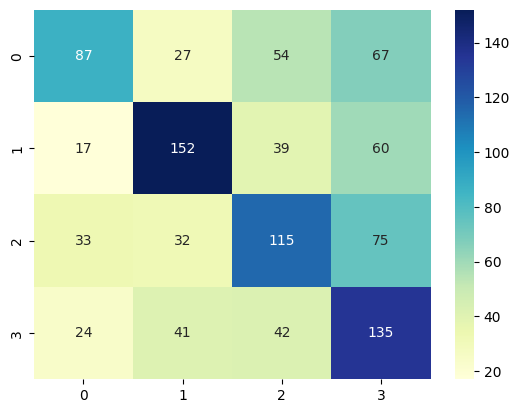

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_test, batch_size=32)
Y_pred = Y_pred.argmax(axis=1)
Y_val = testY.argmax(axis=1)

conf_mat = confusion_matrix(Y_val, Y_pred)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

#### 7.3. Отобразим график обучения

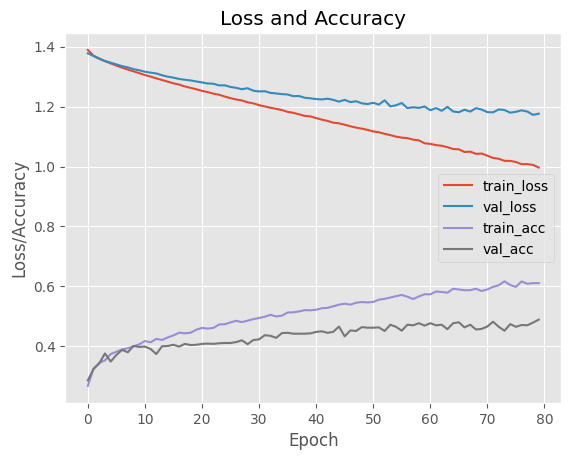

In [30]:
N = np.arange(0, 80)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, result.history["loss"], label="train_loss")
plt.plot(N, result.history["val_loss"], label="val_loss")
plt.plot(N, result.history["accuracy"], label="train_acc")
plt.plot(N, result.history["val_accuracy"], label="val_acc")
plt.title("Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()

### 8. Сохранение модели и меток классов:

In [31]:
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):
    model.save(model_path, save_format="h5")

    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

model_path = "model.h5"
labels_path = "label_bin"

save_model_and_labels(model, unique_labels, model_path, labels_path)

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [32]:
from keras.models import load_model
import gradio as gr
import pickle
import cv2
import numpy as np

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [33]:
def preprocess_image(img, compression_size=64):
    image = img.copy()
    image = cv2.resize(image, (compression_size, compression_size))
    image = image.astype("float32") / 255.0

    if len(image.shape) == 2:
        image = np.expand_dims(image, axis=-1)

    image = np.expand_dims(image, axis=0)

    return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [34]:
import pickle
from tensorflow.keras.models import load_model

def predict_image(img, preprocess_func = preprocess_image, model_path = "model.h5"):

    unique_labels = ['chicken', 'cow', 'dog', 'elephant']

    model = load_model(model_path)

    image = preprocess_func(img.copy())
    image = image.reshape((1, -1))
    preds = model.predict(image).flatten()

    confidences = {unique_labels[i]: float(preds[i]) for i in range(len(preds))}

    return confidences


### 10. Визуализируем интерфейс и произведем классификацию:

In [35]:
unique_labels = ['chicken', 'cow', 'dog', 'elephant']

interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(label="Загрузите изображение"),
    outputs= gr.Label(num_top_classes=len(unique_labels)))

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7ef01c75180ffed9b7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
predict_image(cv2.imread('/content/drive/MyDrive/test_data/OIP-__wtYf6sbvlOlMBMHyA3OAAAAA.jpeg'))